In [11]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import os
import cv2
from warnings import filterwarnings
filterwarnings("ignore")

base_dir = ".\Dataset"
# this is the main directory where all the files are stored

output_dir = ".\Process Folder"
# this is the working directory of the data

splits = {"Training": "training_words", "Validation": "validation_words", "Testing": "testing_words"}
# These are set as the image in training set are in Data/Training/training_words

Ext = (".png", ".jpg",".jpeg", ".bmp", ".tiff", ".tiff")
# This will be used as we will resize the image to 320 x 320
target_size = 320

output_suffix = "gray_320"

In [12]:
split = ["Training", "Validation" ,"Testing"]
for s in split:
    print(f"Files in {s} are below: ")
    for file in os.listdir(base_dir + "/"+ s):
        print(file)
    print()

Files in Training are below: 
training_labels.csv
training_words

Files in Validation are below: 
validation_labels.csv
validation_words

Files in Testing are below: 
testing_labels.csv
testing_words



Shape of the image is :  (84, 207, 3)


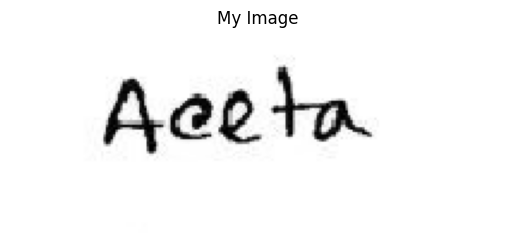

In [6]:
# This is how a singe image looks like 
import cv2
from matplotlib import pyplot as plt

image = cv2.imread(base_dir + "/Training/training_words/1.png")
print("Shape of the image is : ", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.imshow(image_rgb)
plt.title("My Image")
plt.axis('off')  # Hide axes
plt.show()

## Images Preprocessing

In [7]:
def process_dir (input_fol, output_fol, target_size=320):
    os.makedirs(output_fol, exist_ok=True)

    image_files = []
    for ext in Ext:
        image_files.extend(glob(os.path.join(input_fol, f"*{ext}")))

    print(f"\nInput folder : {input_fol}")
    print(f"Output folder : {output_fol}")
    print(f"No.of Files found : {len(image_files)}")

    for i, file_no in enumerate(image_files, start=1):
        img = cv2.imread(file_no)

        # If file is unavailable
        if img is None:
            print(f"Failed to read Image at: {file_no}")
            continue

        # Converting the image into grey Scale
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculating a median of all the pixel intensities
        # This will be used as the background color when padding 
        # the image, making the background blend smoothly.
        bg_color = int(np.median(grey))

        # The original size of the image, It will be 2D as it is Grey scale
        h, w = grey.shape
        # Calculates a scaling factor to resize the image so that neither width nor height exceeds target_size.
        scale = min(target_size/w, target_size/h)
        # Computes the new dimensions by multiplying the original width and height by the scale.
        # new_w, new_h = max(1, (w*scale)), max(1, (h*scale))
        # resized = cv2.resize(grey, (new_w, new_h), interpolation=cv2.INTER_AREA)

        new_w, new_h = int(max(1, w * scale)), int(max(1, h * scale))
        resized = cv2.resize(grey, (new_w, new_h), interpolation=cv2.INTER_AREA)



        canvas = np.full((target_size, target_size), bg_color, dtype=np.uint8)       

        # Places the resized image in the center of the square canvas.
        # 	Calculates the horizontal offset needed to center the image.
        x_offset = (target_size - new_w) // 2
        # - Calculates the vertical offset needed to center the image.
        y_offset = (target_size - new_h) // 2
        # Places the resized image onto the canvas at the calculated position.
        # The canvas is assumed to be a NumPy array of shape(target_size, target_size.
        canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized

        # Extracts the base name (just the file name) from the original file path
        filename = os.path.basename(file_no)
        # Constructs the full path where the image will be saved.
        save_path = os.path.join(output_fol, filename)
        # - Uses OpenCV to write the image data in canvas to the file at save_path
        cv2.imwrite(save_path, canvas)

        if i % 100 == 0 or i == len(image_files):
            print(f"[{i}/{len(image_files)}] ✅ Processed")
            # Prints progress after every 50 images or at the end of the process.

    print(f"🎉 Finished: {input_folder} → {output_folder}")

In [13]:
for s_name, images_subdir in splits.items():
    # This converts mltiple paths into 1
    # This gives images subdirectory
    input_folder = os.path.join(base_dir, s_name, images_subdir)
    
    output_folder = os.path.join(output_dir, s_name, f"{images_subdir}_{output_suffix}_{target_size}")


    if not os.path.isdir(input_folder):
            print(f"⚠️ Skip: folder not found → {input_folder}")
            continue

    process_dir(input_folder, output_folder, target_size)


Input folder : .\Dataset\Training\training_words
Output folder : .\Process Folder\Training\training_words_gray_320_320
No.of Files found : 3120
[100/3120] ✅ Processed
[200/3120] ✅ Processed
[300/3120] ✅ Processed
[400/3120] ✅ Processed
[500/3120] ✅ Processed
[600/3120] ✅ Processed
[700/3120] ✅ Processed
[800/3120] ✅ Processed
[900/3120] ✅ Processed
[1000/3120] ✅ Processed
[1100/3120] ✅ Processed
[1200/3120] ✅ Processed
[1300/3120] ✅ Processed
[1400/3120] ✅ Processed
[1500/3120] ✅ Processed
[1600/3120] ✅ Processed
[1700/3120] ✅ Processed
[1800/3120] ✅ Processed
[1900/3120] ✅ Processed
[2000/3120] ✅ Processed
[2100/3120] ✅ Processed
[2200/3120] ✅ Processed
[2300/3120] ✅ Processed
[2400/3120] ✅ Processed
[2500/3120] ✅ Processed
[2600/3120] ✅ Processed
[2700/3120] ✅ Processed
[2800/3120] ✅ Processed
[2900/3120] ✅ Processed
[3000/3120] ✅ Processed
[3100/3120] ✅ Processed
[3120/3120] ✅ Processed
🎉 Finished: .\Dataset\Training\training_words → .\Process Folder\Training\training_words_gray_32

## Setting Parameters

In [14]:
import torch, random
import torch as nn

# This code is used to reproduce the results
SEED = 50
random.seed(SEED)
# Sets the seed for NumPy’s random number generator.
np.random.seed(SEED)
# Sets the random seed for CPU-based operations in PyTorch —things like weight initialization or shuffling within a PyTorch dataset.
torch.manual_seed(SEED)
# Sets the same random seed for all available GPU devices (CUDA)
# torch.cuda.manual_seed_all(SEED)

# Checks if a GPU (cuda) is available; otherwise, it uses the CPU.
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

# The image resolution (width × height) fed into the neural network.
TARGET_SIZE   = (320, 320)  # <- change to 320x320
BATCH_SIZE    = 32
EPOCHS        = 10
# Learning Rate
LR            = 1e-3
# Regularization term to prevent overfitting by penalizing large weights.
WEIGHT_DECAY  = 1e-4
PATIENCE      = 5          # early stopping
# Controls parallel data loading. 0 avoids multiprocessing errors
NUM_WORKERS   = 0          # set 0 to be safe from DataLoader worker errors
# Creates a folder named checkpoints_resnet18 to save model weights during training (so you can reload the best version later).
SAVE_DIR      = "./checkpoints_resnet18"
os.makedirs(SAVE_DIR, exist_ok=True)

# These are mean and standard deviation values of the ImageNet dataset.
# They’re used to normalize input images so that pretrained models (like ResNet) receive data in the same format as they were trained on originally.
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

Device: cpu


In [15]:
# This is where the preprocessed data is scored
Data_dir = ".\Process Folder"

# Path is provided for Training, Validation, and Testing
# grey_320_320 indicate that images are converted to grey scale and into 320 x 320
TRAIN_IMG_DIR = os.path.join(Data_dir, "Training",   "training_words_gray_320_320")
VAL_IMG_DIR   = os.path.join(Data_dir, "Validation", "validation_words_gray_320_320")
TEST_IMG_DIR  = os.path.join(Data_dir, "Testing",    "testing_words_gray_320_320")

# Giving CSV file paths
csv_base = ".\Dataset"

TRAIN_CSV = os.path.join(csv_base, "Training",   "training_labels.csv")
VAL_CSV   = os.path.join(csv_base, "Validation", "validation_labels.csv")
TEST_CSV  = os.path.join(csv_base, "Testing",    "testing_labels.csv")

for p in [TRAIN_IMG_DIR, VAL_IMG_DIR, TEST_IMG_DIR, TRAIN_CSV, VAL_CSV, TEST_CSV]:
    print("EXISTS: ",p)
    print("-----------------------------------------------------")

EXISTS:  .\Process Folder\Training\training_words_gray_320_320
-----------------------------------------------------
EXISTS:  .\Process Folder\Validation\validation_words_gray_320_320
-----------------------------------------------------
EXISTS:  .\Process Folder\Testing\testing_words_gray_320_320
-----------------------------------------------------
EXISTS:  .\Dataset\Training\training_labels.csv
-----------------------------------------------------
EXISTS:  .\Dataset\Validation\validation_labels.csv
-----------------------------------------------------
EXISTS:  .\Dataset\Testing\testing_labels.csv
-----------------------------------------------------


In [16]:
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms, models

from torch.utils.data import Dataset
# When training deep learning models (like CNNs, RNNs, etc.), data is usually too large to load all at once. Dataset helps you:
# Load data on demand (only when needed).
# Apply transformations or preprocessing automatically.
# Integrate easily with DataLoader to handle batching, shuffling, and parallel loading.

In [17]:
class RXWordsDataset(Dataset):

    def __init__(self, csv_path, img_dir, transform=None, label_encoder=None, fit_encoder=None):
        self.df = pd.read_csv(csv_path)
        # This checks if "IMAGE" col is present or not, else return a message
        # assert condition, (if not met) result
        assert "IMAGE" in self.df.columns, "CSV must have an IMAGE column"
        assert "MEDICINE_NAME" in self.df.columns, "CSV must have a MEDICINE NAME column"

        self.img_dir = img_dir
        self.transform = transform

        if label_encoder is None:
            # label encoder is imported bcz we only have to import when not already imported
            from sklearn.preprocessing import LabelEncoder
            self.le = LabelEncoder()
            fit_encoder = True
        else:
            self.le = label_encoder

        # Fits the label encoder to the unique medicine names in the dataset.
        if fit_encoder:
            self.le.fit(self.df["MEDICINE_NAME"].astype(str).values)

        # Store Encoded Targets and Filenames
        self.targets = self.le.transform(self.df["MEDICINE_NAME"].astype(str).values)
        self.images  = self.df["IMAGE"].astype(str).values
        self.classes = list(self.le.classes_)


    def __len__(self):
        # Tells PyTorch how many samples exist in the dataset (so it can batch properly).
        return len(self.images)


    def __getitem__(self, idx):
        # Selects one image and its label by index.
        img_name = self.images[idx]
        y = self.targets[idx]
        # Concatinate Image directory with name
        path = os.path.join(self.img_dir, img_name)

        # Opens the image safely using Pillow.
        if not os.path.exists(path):
            # An error is raised when image in the Path doesnot exist
            raise FileNotFoundError(f"No image found: {path}")
        with Image.open(path) as im:
            img = im.convert("RGB")
            # As resnet expects 3 channel input so data is converted into 3 channels 

        # Checks if a transformation function (e.g., resizing, normalization, flipping, etc.) has been provided when the dataset was created.
        if self.transform:
            img = self.transform(img)
            
        return img, y
 

The pipeline below does: 
- Resizes the image to (320, 320)

- Randomly distorts color, position, and perspective to simulate real-world handwriting variation.

- Converts to tensor and normalizes using ImageNet mean/std values (important for pretrained models like ResNet).

In [18]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from torchvision import models

# In PyTorch, transform.Compose is a utility provided by the 'torchvision.transforms' module that allows you to chain multiple image 
# transformations together into a single callable object. This is especially useful when preprocessing images for training deep learning models.

train_transform = transforms.Compose([
    # Resizes the image to a fixed size as RESNET requires fixed shape inputs. 
    transforms.Resize(TARGET_SIZE),
    # 'RandomApply' = Randomly applies the listed transform 80% of the time. It adds variety without over-distortion
    # 'ColorJitter' = Randomly changes brightness, contrast, saturation, hue
    transforms.RandomApply([transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.02)], p=0.8),
    # Makes the model rotation-invariant by rotating an image +-3 degrees.
    transforms.RandomRotation(degrees=3),

    # Applies small translations, shear, or scale changes, as it helps model to learn shape flexibility. 
    transforms.RandomAffine(degrees=0, translate=(0.07, 0.07), shear=3, scale=(0.95, 1.05)),
    # Randomly warps the image perspective which adds viewpoint variation
    transforms.RandomPerspective(distortion_scale=0.15, p=0.5),
    # Blurs the image slightly
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.5)),
    # Converts image → PyTorch tensor (C × H × W) which is requried for model input
    transforms.ToTensor(),
    # Normalizes pixels using ImageNet stats
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD), ])

valtest_transform = transforms.Compose([
    # Match model input size
    transforms.Resize(TARGET_SIZE),
    # Convert image to PyTorch tensor
    transforms.ToTensor(),
    # Standardize pixel intensity distribution
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

In [19]:
# Fit LabelEncoder using TRAIN for consistency
# reads your training CSV file that contains medicine names and image paths.
df_train_tmp = pd.read_csv(TRAIN_CSV)
# Convert Medicine name into IDs only for trainig data 
le = LabelEncoder()
le.fit(df_train_tmp["MEDICINE_NAME"].astype(str).values)
num_classes = len(le.classes_)
print("Num classes:", num_classes)

train_ds = RXWordsDataset(TRAIN_CSV, TRAIN_IMG_DIR, transform=train_transform, label_encoder=le, fit_encoder=False)
val_ds   = RXWordsDataset(VAL_CSV,   VAL_IMG_DIR,   transform=valtest_transform, label_encoder=le, fit_encoder=False)
test_ds  = RXWordsDataset(TEST_CSV,  TEST_IMG_DIR,  transform=valtest_transform, label_encoder=le, fit_encoder=False)


# How many images are fed to the model per iteration = Batch_size. This is done because dataset is large and we will import it per iteration
# num_workerss are Number of CPU threads to load images in parallel
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

Num classes: 78


In [20]:
import torch
import torch.nn as nn
import torchvision.models as models


model = models.resnet18(pretrained=True)

In [24]:
# These weights were previously trained on ImageNet, so they already contain good feature extraction capability. 
# The path contains pretrained ResNet18 weights file
MODEL_PATH = "resnet18-f37072fd.pth"
# initialize the structure only, without loading ImageNet weights.
model = models.resnet18(weights=None)

# torch.load reads the weight file from disk and loads it into memory. It loads on CPU if GPU isn't available
state_dict = torch.load(MODEL_PATH, map_location="cpu")
# It then applies those learned weights to the ResNet18 model
model.load_state_dict(state_dict)

# final layer in ResNet18 that performs classification. By default, it outputs 1000 classes but we replace it with no. of labels.
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Transfers the model to either GPU or CPU based on DEVICE.
model = model.to(DEVICE)

# Loss, optimizer, dan scheduler
criterion = nn.CrossEntropyLoss()
# lr → learning rate (how big each update step is)
# weight_decay → adds regularization to reduce overfitting.
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
# Automatically reduces the learning rate when validation accuracy stops improving.
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2)
# This displays the structure of the last fully connected layer after replacement.
print(model.fc)

Linear(in_features=512, out_features=78, bias=True)


In [27]:
def train_one_epoch(model, loader, optimizer, criterion):
    # Sets the model to training mode — enables things like dropout and batch normalization updates.
    model.train()
    total_loss, total_correct, total_samples = 0.0, 0, 0
    # Loops through all batches from the DataLoader. It will give batch of images and a batch of image csv
    for imgs, labels in loader:
        # Moves the batch data to GPU (or CPU) for faster computation.
        imgs = imgs.to(DEVICE, non_blocking=True)
        labels = labels.to(DEVICE, non_blocking=True)

        # Clears any previous gradients stored in the optimizer (important to avoid accumulation).
        optimizer.zero_grad()
        # Feeds the images through the model to get raw predictions (logits) — not probabilities yet.
        logits = model(imgs)
        # Calculates how far off the predictions are from the true labels using the loss function.
        loss = criterion(logits, labels)
        # Computes gradients for all model parameters (backpropagation).
        loss.backward()
        # Updates model weights using the computed gradients.
        optimizer.step()

        # Takes the index of the largest logit value → predicted class label for each image.
        preds = logits.argmax(1)
        # Adds the batch loss to total loss (multiplied by batch size since .item() is per batch).
        total_loss += loss.item() * imgs.size(0)
        total_correct += (preds == labels).sum().item()
        total_samples += imgs.size(0)

    return total_loss/total_samples, total_correct/total_samples

In [28]:
# This decorator disables gradient calculation
@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, total_correct, total_samples = 0.0, 0, 0
    all_preds, all_labels = [], []
    for imgs, labels in loader:
        imgs = imgs.to(DEVICE, non_blocking=True)
        labels = labels.to(DEVICE, non_blocking=True)
        logits = model(imgs)
        loss = criterion(logits, labels)
        preds = logits.argmax(1)

        total_loss += loss.item() * imgs.size(0)
        total_correct += (preds == labels).sum().item()
        total_samples += imgs.size(0)

        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

    avg_loss = total_loss/total_samples
    avg_acc  = total_correct/total_samples
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return avg_loss, avg_acc, all_preds, all_labels

In [29]:
import time
best_val_acc = 0.0
epochs_no_improve = 0
best_path = os.path.join(SAVE_DIR, "best_resnet18.pt")

history = {
    "train_loss": [], "train_acc": [],
    "val_loss": [], "val_acc": []
}

for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    va_loss, va_acc, _, _ = evaluate(model, val_loader, criterion)
    scheduler.step(va_acc)

    # simpan history
    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss)
    history["val_acc"].append(va_acc)

    print(f"[Epoch {epoch:02d}/{EPOCHS}] "
          f"train_loss={tr_loss:.4f} train_acc={tr_acc:.4f} | "
          f"val_loss={va_loss:.4f} val_acc={va_acc:.4f} | "
          f"time={(time.time()-t0):.1f}s")
    
    # checkpoint
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        epochs_no_improve = 0
        torch.save({
            "epoch": epoch,
            "state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "val_acc": va_acc,
            "label_map": list(le.classes_)
        }, best_path)
        print(f"  -> Improved. Saved to {best_path}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print(f"Early stopping (no improve {PATIENCE} epochs).")
            break

print("Best Val Acc:", best_val_acc)

KeyboardInterrupt: 

In [ ]:
import json
from sklearn.metrics import classification_report, confusion_matrix

# Load best
if os.path.exists(best_path):
    ckpt = torch.load(best_path, map_location=DEVICE)
    model.load_state_dict(ckpt["state_dict"])
    print(f"Loaded best from epoch {ckpt['epoch']} with val_acc={ckpt['val_acc']:.4f}")
else:
    print("WARNING: best checkpoint not found, using current weights.")

# Evaluate on TEST
test_loss, test_acc, y_pred, y_true = evaluate(model, test_loader, criterion)
print("\n=== TEST METRICS ===")
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Acc  : {test_acc:.4f}")

# Classification report
target_names = list(le.classes_)
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print("\nClassification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
cm_csv = os.path.join(SAVE_DIR, "confusion_matrix_resnet18.csv")
cm_df.to_csv(cm_csv, encoding="utf-8-sig")
print("Confusion matrix saved to:", cm_csv)

# Simpan label map
label_map_path = os.path.join(SAVE_DIR, "label_map.json")
with open(label_map_path, "w", encoding="utf-8") as f:
    json.dump({i: cls for i, cls in enumerate(target_names)}, f, ensure_ascii=False, indent=2)
print("Label map saved to:", label_map_path)

In [ ]:
# Visualisasi prediksi + generic dari mapping 
import matplotlib.pyplot as plt
import random
import numpy as np
import torch

def _undo_norm_to_rgb(img_tensor):
    img_np = img_tensor.permute(1, 2, 0).cpu().numpy()
    if img_np.shape[2] == 3:
        img_np = img_np * np.array(IMAGENET_STD) + np.array(IMAGENET_MEAN)
    else:
        img_np = img_np * np.array(GRAY_STD) + np.array(GRAY_MEAN)
        img_np = np.repeat(img_np, 3, axis=2)
    return np.clip(img_np, 0, 1)

def show_random_predictions_with_generic_map_single(
    model, dataset, le, med2gen_map, num_images=12
):
    model.eval()
    idxs = random.sample(range(len(dataset)), num_images)

    plt.figure(figsize=(16, 9))
    for i, idx in enumerate(idxs):
        img, y_med = dataset[idx]  # dataset single-label
        with torch.no_grad():
            out = model(img.unsqueeze(0).to(DEVICE))
            pred_idx = out.argmax(1).item()

        # convert ke gambar
        img_np = _undo_norm_to_rgb(img)

        true_med_str = le.classes_[y_med]
        pred_med_str = le.classes_[pred_idx]

        # GENERIC dari mapping
        true_gen_str = med2gen_map.get(true_med_str, "?")
        pred_gen_str = med2gen_map.get(pred_med_str, "<NA>")

        # Warna hijau kalau MED benar
        color = "green" if true_med_str == pred_med_str else "red"

        title_lines = [
            f"MED  T: {true_med_str}",
            f"MED  P: {pred_med_str}",
            f"GEN  T: {true_gen_str}",
            f"GEN  P: {pred_gen_str}",
        ]

        plt.subplot(int(np.ceil(num_images/4)), 4, i+1)
        plt.imshow(img_np)
        plt.title("\n".join(title_lines), color=color, fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
def show_random_predictions_medicine_only(model, dataset, le, num_images=12):
    model.eval()
    idxs = random.sample(range(len(dataset)), num_images)

    plt.figure(figsize=(16, 9))
    for i, idx in enumerate(idxs):
        img, y_med = dataset[idx]
        with torch.no_grad():
            out = model(img.unsqueeze(0).to(DEVICE))
            pred_idx = out.argmax(1).item()

        # undo normalisasi
        img_np = img.permute(1, 2, 0).cpu().numpy()
        if img_np.shape[2] == 3:
            img_np = img_np * np.array(IMAGENET_STD) + np.array(IMAGENET_MEAN)
        else:
            img_np = img_np * np.array(GRAY_STD) + np.array(GRAY_MEAN)
            img_np = np.repeat(img_np, 3, axis=2)
        img_np = np.clip(img_np, 0, 1)

        true_med_str = le.classes_[y_med]
        pred_med_str = le.classes_[pred_idx]

        color = "green" if true_med_str == pred_med_str else "red"

        plt.subplot(int(np.ceil(num_images/4)), 4, i+1)
        plt.imshow(img_np)
        plt.title(f"T: {true_med_str}\nP: {pred_med_str}",
                  color=color, fontsize=9)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Cell C
# show_random_predictions_with_generic_map_single(
#     model, test_ds, le, med2gen_map, num_images=12
# )
# show_random_predictions_medicine_only(
#     model, test_ds, le, num_images=12
# )

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history["train_loss"]) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Prediction

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import json
import os
import numpy as np

class MedicinePredictor:
    def __init__(self, checkpoint_path, device='cpu'):
        """
        Initialize the predictor with a trained model checkpoint.
        
        Args:
            checkpoint_path: Path to the best_resnet18.pt file
            device: 'cuda' or 'cpu'
        """
        self.device = device
        
        # Load checkpoint
        print(f"Loading checkpoint from {checkpoint_path}...")
        checkpoint = torch.load(checkpoint_path, map_location=device)
        
        # Get label mapping
        self.label_map = checkpoint['label_map']
        self.num_classes = len(self.label_map)
        print(f"Loaded {self.num_classes} medicine classes")
        
        # Initialize model
        self.model = models.resnet18(weights=None)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, self.num_classes)
        
        # Load weights
        self.model.load_state_dict(checkpoint['state_dict'])
        self.model = self.model.to(device)
        self.model.eval()
        
        print(f"Model loaded successfully (trained on epoch {checkpoint['epoch']} with val_acc={checkpoint['val_acc']:.4f})")
        
        # Define transforms (same as validation/test)
        self.transform = transforms.Compose([
            transforms.Resize((320, 320)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    
    def predict(self, image_path, top_k=5):
        """
        Predict medicine name from an image.
        
        Args:
            image_path: Path to the image file
            top_k: Return top K predictions with probabilities
            
        Returns:
            Dictionary with prediction results
        """
        # Check if file exists
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found: {image_path}")
        
        # Load and preprocess image
        img = Image.open(image_path).convert('RGB')
        img_tensor = self.transform(img).unsqueeze(0).to(self.device)
        
        # Predict
        with torch.no_grad():
            logits = self.model(img_tensor)
            probs = torch.softmax(logits, dim=1)
            
            # Get top K predictions
            top_probs, top_indices = torch.topk(probs, k=min(top_k, self.num_classes), dim=1)
            top_probs = top_probs.cpu().numpy()[0]
            top_indices = top_indices.cpu().numpy()[0]
        
        # Format results
        predictions = []
        for prob, idx in zip(top_probs, top_indices):
            predictions.append({
                'medicine_name': self.label_map[idx],
                'confidence': float(prob),
                'confidence_percent': f"{prob*100:.2f}%"
            })
        
        return {
            'image_path': image_path,
            'top_prediction': predictions[0]['medicine_name'],
            'confidence': predictions[0]['confidence'],
            'all_predictions': predictions
        }
    
    def predict_batch(self, image_paths, top_k=5):
        """
        Predict multiple images at once.
        
        Args:
            image_paths: List of image paths
            top_k: Return top K predictions for each image
            
        Returns:
            List of prediction results
        """
        results = []
        for img_path in image_paths:
            try:
                result = self.predict(img_path, top_k)
                results.append(result)
            except Exception as e:
                results.append({
                    'image_path': img_path,
                    'error': str(e)
                })
        return results


# Example usage
if __name__ == "__main__":
    # Initialize predictor
    checkpoint_path = "./checkpoints_resnet18/best_resnet18.pt"
    predictor = MedicinePredictor(checkpoint_path, device='cpu')
    
    # Single prediction
    image_path = "path/to/your/image.png"
    
    try:
        result = predictor.predict(image_path, top_k=5)
        
        print("\n" + "="*50)
        print("PREDICTION RESULTS")
        print("="*50)
        print(f"Image: {result['image_path']}")
        print(f"\nTop Prediction: {result['top_prediction']}")
        print(f"Confidence: {result['confidence']*100:.2f}%")
        print("\nTop 5 Predictions:")
        print("-"*50)
        for i, pred in enumerate(result['all_predictions'], 1):
            print(f"{i}. {pred['medicine_name']:20s} - {pred['confidence_percent']}")
        print("="*50)
        
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("\nPlease update 'image_path' with a valid image file path")
    
    # Batch prediction example
    # image_paths = ["image1.png", "image2.png", "image3.png"]
    # batch_results = predictor.predict_batch(image_paths)
    # for result in batch_results:
    #     if 'error' in result:
    #         print(f"Error for {result['image_path']}: {result['error']}")
    #     else:
    #         print(f"{result['image_path']}: {result['top_prediction']} ({result['confidence']*100:.2f}%)")